In [2]:
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt

In [212]:
observables = SparsePauliOp(['XYZ'], [1])

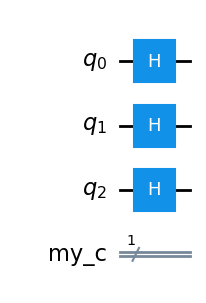

In [213]:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
circuit.draw(reverse_bits=False)

In [16]:
N = 1000
res = []

observables = SparsePauliOp(['XYZ'], [1])

circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
print(circuit)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

        ┌───┐
   q_2: ┤ H ├
        ├───┤
   q_1: ┤ H ├
        ├───┤
   q_0: ┤ H ├
        └───┘
my_c: 1/═════
             
[array(0.00488281), array(0.00341797), array(0.00048828), array(-0.01708984), array(-0.01171875), array(-0.00683594), array(0.01025391), array(-0.00097656), array(-0.00488281), array(0.02783203), array(0.00878906), array(0.00390625), array(0.01123047), array(-0.02978516), array(0.02099609), array(-0.01660156), array(-0.00732422), array(-0.01220703), array(0.00195312), array(0.01855469), array(-0.02050781), array(0.00097656), array(0.00195312), array(-0.01953125), array(0.00683594), array(0.00537109), array(0.02148438), array(-0.02587891), array(-0.02246094), array(0.), array(-0.00292969), array(0.00341797), array(-0.02490234), array(-0.02880859), array(0.01464844), array(0.00341797), array(-0.01806641), array(-0.00195312), array(-0.01367188), array(-0.01757812), array(-0.00830078), array(-0.00244141), array(0.00195312), array(-0.01464844), array(-0.02050781), ar

In [11]:
N = 1000
res = []

observables = SparsePauliOp(['XYZ'], [1])

circuit = QuantumCircuit(3)
circuit.x([0,1])
circuit.x([2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
print(circuit)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

        ┌───┐
   q_2: ┤ X ├
        ├───┤
   q_1: ┤ X ├
        ├───┤
   q_0: ┤ X ├
        └───┘
my_c: 1/═════
             
[array(-0.00830078), array(-0.00537109), array(-0.00830078), array(0.00048828), array(-0.01123047), array(-0.00537109), array(0.00439453), array(0.00341797), array(-0.01708984), array(0.00976562), array(0.01660156), array(0.00292969), array(0.01464844), array(-0.02148438), array(-0.015625), array(-0.00244141), array(-0.01367188), array(0.00683594), array(0.00195312), array(0.01074219), array(0.00439453), array(-0.00244141), array(-0.00292969), array(0.01953125), array(0.00048828), array(0.02539062), array(0.00634766), array(-0.00048828), array(0.00830078), array(0.01611328), array(0.01171875), array(0.01806641), array(0.00195312), array(0.00292969), array(0.02294922), array(0.00927734), array(-0.00195312), array(-0.01123047), array(-0.00537109), array(0.01464844), array(0.02099609), array(-0.00195312), array(0.00244141), array(-0.01269531), array(0.01513672), ar

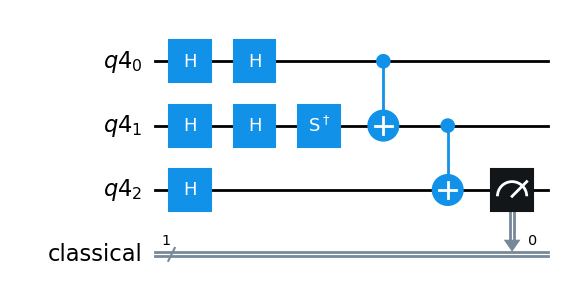

In [121]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])
circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
circuit.draw(reverse_bits=False)

In [8]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])

circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 5000)])
    counts = job.result()[0].data.classical.get_counts()
    # print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    # print("Probabilities:", probabilities)

    exp_vals = probabilities['0'] - probabilities['1']
    # print("Expectation Value:", exp_vals)

    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

             ┌───┐                 ┌───┐┌─┐
       q5_2: ┤ H ├─────────────────┤ X ├┤M├
             ├───┤┌───┐┌─────┐┌───┐└─┬─┘└╥┘
       q5_1: ┤ H ├┤ H ├┤ Sdg ├┤ X ├──■───╫─
             ├───┤├───┤└─────┘└─┬─┘      ║ 
       q5_0: ┤ H ├┤ H ├─────────■────────╫─
             └───┘└───┘                  ║ 
classical: 1/════════════════════════════╩═
                                         0 
[-0.011600000000000055, -0.008799999999999975, 0.0023999999999999577, -0.010399999999999965, -0.023200000000000054, -0.02639999999999998, -0.007600000000000051, -0.0020000000000000018, 0.022399999999999975, -0.027199999999999946, 0.006000000000000005, -0.014000000000000012, -0.01200000000000001, 0.011200000000000043, 0.01720000000000005, -0.03560000000000002, -0.008000000000000007, 0.022799999999999987, -0.01720000000000005, 0.007600000000000051, 0.008799999999999975, -0.008000000000000007, -0.0040000000000000036, 0.03560000000000002, 0.002799999999999969, 0.018399999999999972, 0.00600000000000000

In [12]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.x([0,1])
circuit.x([2])

circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 4096)])
    counts = job.result()[0].data.classical.get_counts()
    print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    # print("Probabilities:", probabilities)
    print(probabilities['0'])

    exp_vals = probabilities['0'] - probabilities['1']
    # print("Expectation Value:", exp_vals)

    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

             ┌───┐                 ┌───┐┌─┐
       q5_2: ┤ X ├─────────────────┤ X ├┤M├
             ├───┤┌───┐┌─────┐┌───┐└─┬─┘└╥┘
       q5_1: ┤ X ├┤ H ├┤ Sdg ├┤ X ├──■───╫─
             ├───┤├───┤└─────┘└─┬─┘      ║ 
       q5_0: ┤ X ├┤ H ├─────────■────────╫─
             └───┘└───┘                  ║ 
classical: 1/════════════════════════════╩═
                                         0 
Result Counts: {'0': 2027, '1': 2069}
0.494873046875
Result Counts: {'0': 2072, '1': 2024}
0.505859375
Result Counts: {'0': 2035, '1': 2061}
0.496826171875
Result Counts: {'1': 2035, '0': 2061}
0.503173828125
Result Counts: {'0': 2082, '1': 2014}
0.50830078125
Result Counts: {'0': 2053, '1': 2043}
0.501220703125
Result Counts: {'1': 2042, '0': 2054}
0.50146484375
Result Counts: {'1': 2070, '0': 2026}
0.49462890625
Result Counts: {'0': 2084, '1': 2012}
0.5087890625
Result Counts: {'1': 2041, '0': 2055}
0.501708984375
Result Counts: {'1': 2044, '0': 2052}
0.5009765625
Result Counts: {'1': 2036, '0':

In [ ]:
0.014